# Analytics on Real estate property using Machine Learning

In [1]:
#Target variable: Sale_Price

In [2]:
import pandas as pd

In [3]:
pa=pd.read_csv("F:\Imaticus\Data set\Property_Price_Train.csv")

In [4]:
pa.shape

(1459, 81)

In [5]:
pa.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,...,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
pa.isnull().sum()

Id                  0
Building_Class      0
Zoning_Class        0
Lot_Extent        259
Lot_Size            0
                 ... 
Month_Sold          0
Year_Sold           0
Sale_Type           0
Sale_Condition      0
Sale_Price          0
Length: 81, dtype: int64

In [7]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [8]:
pa.isnull().sum()[pa.isnull().sum()>0] 
#name of those columns which have nulls

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [9]:
#what is %nulls for a col??   ans Total num of null in col*100/ total number of records

In [10]:
pa.isnull().sum()[pa.isnull().sum() *100 /pa.shape[0]>50] #percentage null

Lane_Type                1368
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [11]:
#drop columns having huge nulls more than 50%

In [12]:
pa = pa.drop(columns =['Lane_Type' ,'Fireplace_Quality'  , 'Pool_Quality' , 'Fence_Quality','Miscellaneous_Feature', 'Id'] )


In [13]:
pa.isnull().sum()[pa.isnull().sum()>0] 

Lot_Extent            259
Brick_Veneer_Type       8
Brick_Veneer_Area       8
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Electrical_System       1
Garage                 81
Garage_Built_Year      81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
dtype: int64

In [14]:
pa.Lot_Extent=pa.Lot_Extent.fillna(pa.Lot_Extent.mean())
pa.Brick_Veneer_Type=pa.Brick_Veneer_Type.fillna('None')
pa.Brick_Veneer_Area=pa.Brick_Veneer_Area.fillna(pa.Brick_Veneer_Area.mean())
pa.Basement_Height=pa.Basement_Height.fillna('TA')
pa.Basement_Condition=pa.Basement_Condition.fillna('TA')
pa.Exposure_Level=pa.Exposure_Level.fillna('No')
pa.BsmtFinType1=pa.BsmtFinType1.fillna('Unf')
pa.BsmtFinType2=pa.BsmtFinType2.fillna('Unf')
pa.Electrical_System=pa.Electrical_System.fillna('SBrkr')
pa.Garage=pa.Garage.fillna('Attchd')
pa.Garage_Built_Year=pa.Garage_Built_Year.fillna(pa.Garage_Built_Year.mean())
pa.Garage_Finish_Year=pa.Garage_Finish_Year.fillna('Unf')
pa.Garage_Quality=pa.Garage_Quality.fillna('TA')
pa.Garage_Condition=pa.Garage_Condition.fillna('TA')


In [15]:
pa.isnull().sum()[pa.isnull().sum()>0] # nulls have been removed

Series([], dtype: int64)

In [16]:
pa.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [18]:
pa.Zoning_Class.value_counts()

RLD       1150
RMD        218
FVR         65
RHD         16
Commer      10
Name: Zoning_Class, dtype: int64

In [19]:
pa.select_dtypes(include= ['object']).columns

Index(['Zoning_Class', 'Road_Type', 'Property_Shape', 'Land_Outline',
       'Utility_Type', 'Lot_Configuration', 'Property_Slope', 'Neighborhood',
       'Condition1', 'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [20]:
pa[pa.select_dtypes(include= ['object']).columns]  = pa[pa.select_dtypes(include= ['object']).columns].apply(le.fit_transform)


In [21]:
pa.Zoning_Class.value_counts()

3    1150
4     218
1      65
2      16
0      10
Name: Zoning_Class, dtype: int64

In [22]:
pa.head(2)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500


In [23]:
pa.dtypes[pa.dtypes=='object'] #empty list

Series([], dtype: object)

In [74]:
pa=pa.loc[:,l2]   #building model changes

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
pa_train, pa_test=train_test_split(pa,test_size=.2)

In [77]:
pa_train_x=pa_train.iloc[:,0:-1]
pa_train_y=pa_train.iloc[:,-1]

In [78]:
pa_test_x =pa_test.iloc[:,0:-1]
pa_test_y =pa_test.iloc[:,-1]

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
linreg_pa=LinearRegression()

In [81]:
linreg_pa.fit(pa_train_x,pa_train_y)

LinearRegression()

In [82]:
Rsquare=linreg_pa.score(pa_train_x,pa_train_y)
Rsquare

0.8331224141419805

In [83]:
N=pa_train_x.shape[0]
K=pa_train_x.shape[1]

In [84]:
#Adjusted Rsquare
AdjRsquare =1-(1-Rsquare)*(N-1)/(N-K-1)
AdjRsquare

0.8264234923189556

In [85]:
pred_train_pa=linreg_pa.predict(pa_train_x) #predicted values on train data
pred_test_pa=linreg_pa.predict(pa_test_x) #predicted values on test data

In [86]:
err_train_pa  = pa_train_y -  pred_train_pa
err_test_pa = pa_test_y -  pred_test_pa


In [87]:
#Lets check assumptions

In [88]:
import numpy as np

In [89]:
np.mean(err_train_pa)

-1.679892047614038e-10

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([  2.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,  10.,  62., 432.,
        549.,  82.,  14.,   7.,   2.,   3.,   1.,   0.,   1.]),
 array([-357790.77602382, -325566.68504496, -293342.59406611,
        -261118.50308725, -228894.41210839, -196670.32112954,
        -164446.23015068, -132222.13917182,  -99998.04819297,
         -67773.95721411,  -35549.86623525,   -3325.7752564 ,
          28898.31572246,   61122.40670132,   93346.49768017,
         125570.58865903,  157794.67963789,  190018.77061674,
         222242.8615956 ,  254466.95257446,  286691.04355331]),
 <BarContainer object of 20 artists>)

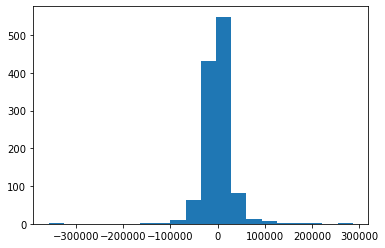

In [91]:
plt.hist(err_train_pa, bins=20)

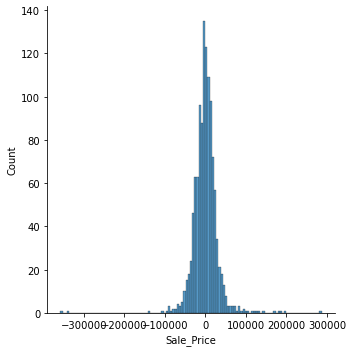

In [92]:
sns.displot(err_train_pa)

E:\Anakonda2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


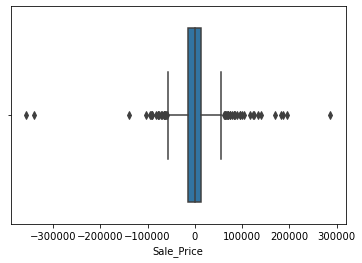

In [93]:
sns.boxplot(err_train_pa);

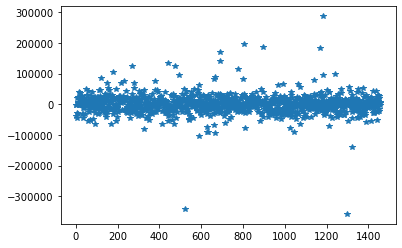

In [94]:
plt.plot(err_train_pa, '*') #outliers

In [95]:
pred_actual_pa=pd.DataFrame()
pred_actual_pa['Actual']=pa_train_y
pred_actual_pa['Predicted']=pred_train_pa

E:\Anakonda2022\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

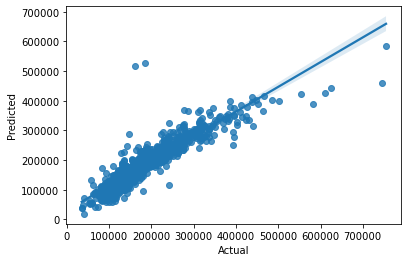

In [96]:
sns.regplot(pred_actual_pa.Actual,pred_actual_pa.Predicted)

In [97]:
MSE_test_pa=np.mean(np.square(err_test_pa))
MSE_test_pa

641266860.3951905

In [98]:
RMSE_test_pa=np.sqrt(MSE_test_pa)
RMSE_test_pa

25323.24742988526

In [99]:
MAE_test_pa=np.mean(np.abs(err_test_pa))
MAE_test_pa

18240.20801906062

In [100]:
MAPE_pa=np.mean(np.abs((err_test_pa*100)/pa_test_y))
MAPE_pa

10.676960236518868

In [101]:
ACC_pa=100-MAPE_pa
ACC_pa

89.32303976348113

In [102]:
pa.Sale_Price.describe() #before outliers

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [54]:
def remove_outliers(df,  col,k):   
        mean = df[col].mean()
        global df1  # output  dataframe which will have data after outliers are removed 
        sd = df[col].std()    
        final_list = [x for x in df[col] if (x > mean - k * sd)]
        final_list = [x for x in final_list if (x < mean + k * sd)]       
        df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)     
        print("Number of outliers removed == >"   ,  df.shape[0]  - df1.shape[0])



In [55]:
remove_outliers(pa,'Sale_Price',2) #calling the progran

(1396, 75)
Number of outliers removed == > 63


In [56]:
df1.Sale_Price.describe() #after outliers 

count      1396.000000
mean     170010.201289
std       58940.755189
min       34900.000000
25%      128987.500000
50%      159500.000000
75%      203000.000000
max      339750.000000
Name: Sale_Price, dtype: float64

In [57]:
#max price of property      755000.0  before outlier
##max price of property     339750.0  after removing outlier
#so model cant be used for property prices higher than 339750.0

In [58]:
pa_train_x.shape

(1167, 74)

In [59]:
# i build the model for 1st time using 74 x variables( almots alll x variables)

# bcoz i do not know which x variable may be important / significant
#( some X variables may have more relation with y and some less
#  and some may be insifgnificant)


# what are the 2 main aim of building the model ????( Evalution)

# 1 to get the model which has high performace 
# 2 my model should be as simple as possible ( so that we can iterpret it and make business decisions )


# suppose person want to lose weight (1 diet , 2 exercise)

# 1perosn was 80 kgs ..and he folows th same diest but exersiong( 5 km perday)  an in one month he losess 5 kgs (  have undestaing if running on weigt loss)

# 2perosn was 80 kgs ..and he only makes change in diet and no other change( and loses 4 kg in 1 month)

# 3 perosn was 80 kgs and starts exer and diet both and loses 6.5 kg in 1 month()

#


In [60]:
# i will build the model once more but this time lets use only significant variable

In [61]:
# lets find corelation in all x variable with respect to y

In [62]:
l1=list(pa_train_x.columns)  #l1 stores columns of X variables

In [63]:
corr_list=[]
for col in l1:
    corr_list.append(pa.Sale_Price.corr(pa[col]))

In [64]:
df1=pd.DataFrame()

In [65]:
df1["Name_of_col"]=l1
df1["Correlation"]=corr_list

In [66]:
df2=df1[(df1.Correlation>.1) | (df1.Correlation<-.1)]

In [67]:
l2=list(df2.Name_of_col)

In [68]:
l2.append('Sale_Price')

In [69]:
l2

['Zoning_Class',
 'Lot_Extent',
 'Lot_Size',
 'Property_Shape',
 'Neighborhood',
 'House_Design',
 'Overall_Material',
 'Construction_Year',
 'Remodel_Year',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Area',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Exposure_Level',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Kitchen_Quality',
 'Rooms_Above_Grade',
 'Functional_Rate',
 'Fireplaces',
 'Garage',
 'Garage_Built_Year',
 'Garage_Finish_Year',
 'Garage_Size',
 'Garage_Condition',
 'Pavedd_Drive',
 'Screen_Lobby_Area',
 'Sale_Condition',
 'Sale_Price']

In [70]:
#lets build model using only these x variables

In [71]:
len(l2)

46

In [72]:
# pa=pa.loc[:,l2]   #building model changes   check this line where it is inserted 
#this lines reduces data 
#so put it before train and test and run again  ,just one line it will do all changes


In [73]:
# so before changes with 74 columns rsquare value of  .84
# after changes with 45 columns rsquare value of  .81